# Simulating target movement and testing filter

This code simulates a target, tracks the target position (both true and "noisy") and logs the estimates of position and velocity from a filter (assumed to be a class Kalman in file Kalman.py). True and estimated values are shown as plots.

This way of visualizing estimates may be easier to interpret than using the HitTheTarget game directly.

Some tips for "tuning" an alpha-beta-gamma filter:
- Alpha, beta and gamma should always be less than 1, and if there is a lot of noise, they should be quite small. Their relative sizes should follow alpha > beta > gamma.
- Start with setting beta and gamma to zero and find a value which creates a fairly smooth position estimate.
- Next, try gradually increasing beta until the velocity estimate "follows" the real velocity, while still being fairly smooth. You can expect the estimated velocity to "lag behind" the true velocity a little bit. 
- Next, try increasing gamma. If successful, it will close the velocity "gap" due to lag. Tuning gamma can be quite hard.
- Oscillations are a sign of an unstable system, with too high beta and/or gamma values 
- Setting good initial "guesses" for position, velocity and acceleration can help the filter find good estimates faster.

In [15]:
from random import random
import numpy as np
import matplotlib.pyplot as plt
import Kalman
from HitTheTarget import Target
import importlib

In [16]:
n = 650                  # Number of iterations
dt = 1                   # delta t
t = np.arange(0,n,dt)    # Time vector

In [17]:
# Simulate target moving, log true and estimated values
# NOTE: Every target has a different starting position, velocity and speed
# Try running this cell and the cell below several times to see how the filter performs for different data
target = Target(background = None, y_target_bottom=0)
importlib.reload(Kalman)    # Reload in case we've changed filter parameters in Kalman.py
kalman = Kalman.Kalman()
x_noisy = []
x_true = []
v_true = []
a_true = []
x_est = []
v_est = []
a_est = []

for _ in range(n):
    zi = target.noisy_x_pos()
    x_noisy.append(zi)
    x_true.append(target.x)
    v_true.append(target.vx)
    a_true.append(target.ax)
    x_hat,v_hat = kalman.estimate_current_position_and_velocity(zi)
    x_est.append(x_hat)
    v_est.append(v_hat)
    if kalman.current_estimated_acceleration:                # Read acceleration estimate directly. Change if you've named "current acceleration" differently
        a_est.append(kalman.current_estimated_acceleration)    
    target.move()

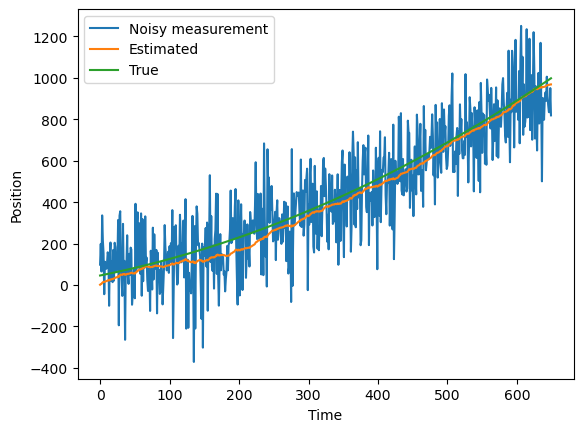

In [18]:
# Plot position
plt.plot(t,x_noisy,label = 'Noisy measurement')
plt.plot(t,x_est, label = 'Estimated')
plt.plot(t,x_true, label = 'True')
plt.ylabel('Position')
plt.xlabel('Time')
plt.legend()
plt.show()

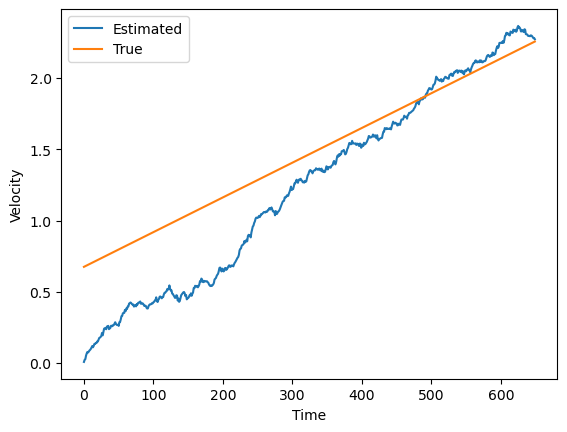

In [19]:
# Plot velocity
plt.plot(t,v_est, label = 'Estimated')
plt.plot(t,v_true, label = 'True')
plt.ylabel('Velocity')
plt.xlabel('Time')
plt.legend()
plt.show()

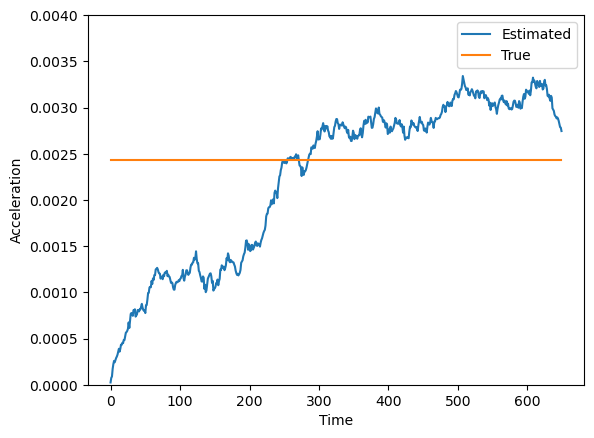

In [20]:
# Plot acceleration
if a_est:
    plt.plot(t,a_est, label = 'Estimated')
    plt.plot(t,a_true, label = 'True')
    plt.ylabel('Acceleration')
    plt.xlabel('Time')
    plt.ylim(0,0.004)
    plt.legend()
    plt.show()